# 1.kNN clustering on Retail data for customer segmentation
![Binary classification](ressources/customers.jpeg)


## About the dataset:
Online retail is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Business Goal
We aim to segement the Customers based on k-means so that the company can target its customers efficiently.

## Your tasks:
## Please implement it in the following order:


1. Load and explore the dataset: 
    - Count number of purchases by customer ID
    - Plot 10 most-purchasing customers(barplot)

2. EDA - Feature Engineering:
    - Use data to build the following new features which we will use for clustering: 
        1. Monetary: Total amount(revenue contributed) of transactions: 
                -userpurchases(amount) * unit price
        2. Frequency: Number of transactions
                - count number of user purchases
    - NOTE: At the end of above step you should have a table, where each row represents a user ID, with the 2 specified features from above
    - Mean-center and standardize the data
        - check out: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    - Plot the data
    ## OUTLIERS!
    - Remove outliers with the given function
    - Plot the cleaned data
    
    
3. Apply kNN on the dataset:
    - Cluster the training data
    - Scatterplot the data and color each point depending on its cluster
    - Try to use different numbers of clusters centres k

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
data = pd.read_csv('data/OnlineRetail.csv', encoding='latin')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_data, test_data = train_test_split(data, test_size=0.2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data = train_data.dropna()

In [8]:
# Changing the datatype of Customer Id as per Business understanding
data['CustomerID'] = data['CustomerID'].astype(str)

/home/dg/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
# Monetary feature
data['Amount'] = data['Quantity']*data['UnitPrice']
feature_mon = data.groupby('CustomerID')['Amount'].sum()
feature_mon = feature_mon.reset_index()
feature_mon.head()

/home/dg/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,3459.09
2,12348.0,1588.48
3,12349.0,1469.76
4,12350.0,258.80


In [11]:
# Frequency feature
feature_freq = data.groupby('CustomerID')['InvoiceNo'].count()
feature_freq = feature_freq.reset_index()
feature_freq.columns = ['CustomerID', 'Frequency']
feature_freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,154
2,12348.0,28
3,12349.0,58
4,12350.0,13


In [12]:
new_df = pd.merge(feature_mon, feature_freq, on='CustomerID', how='inner')
new_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,3459.09,154
2,12348.0,1588.48,28
3,12349.0,1469.76,58
4,12350.0,258.80,13


In [13]:
final_data = new_df[['Amount', 'Frequency']]

In [15]:
# Rescale the attributes
scaler = StandardScaler()

final_data = scaler.fit_transform(final_data)
final_data.shape

(4354, 2)

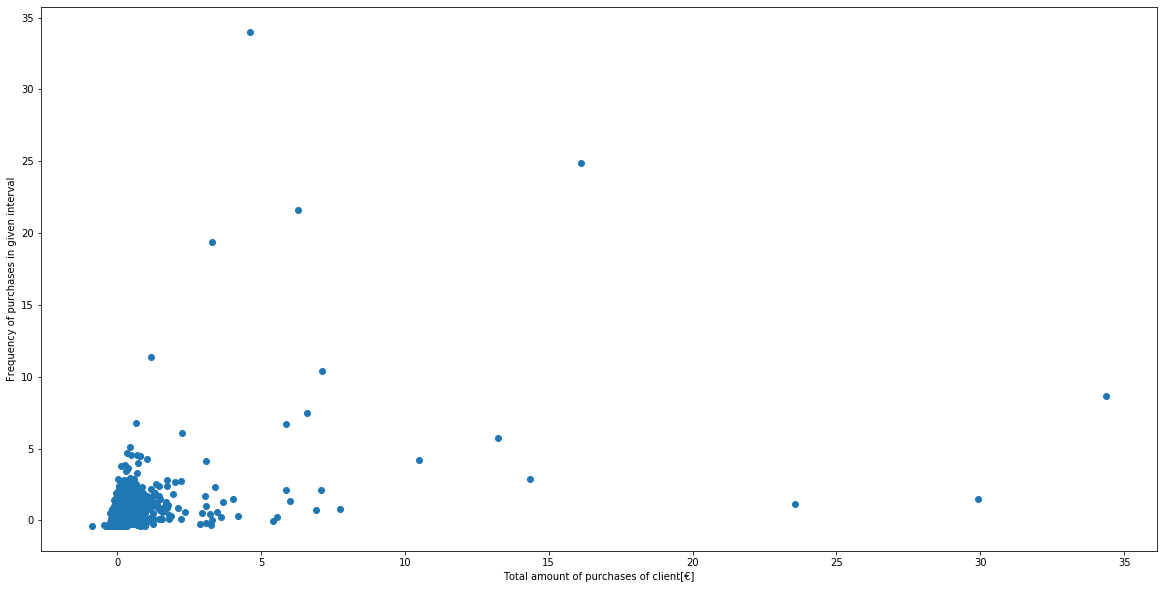

In [16]:
fig = plt.figure(figsize=(20,10))
plt.scatter(final_data[:,0], final_data[:,1])
plt.xlabel('Total amount of purchases of client[€]')
plt.ylabel('Frequency of purchases in given interval')
plt.show()

### Z-scores
---
doc: https://www.investopedia.com/terms/z/zscore.asp

In [26]:
### USE THIS FUNCTION TO REMOVE OUTLIERS AFTER STANDARDIZING THE DATA
from scipy import stats
def remove_outliers(df, thresh=1):
    
    z_scores = np.abs(stats.zscore(df))
    df = df[(z_scores < thresh).all(axis=1)]
    
    return df
    
clean_df = remove_outliers(final_data, 0.5)

In [27]:
clean_df.shape

(3852, 2)

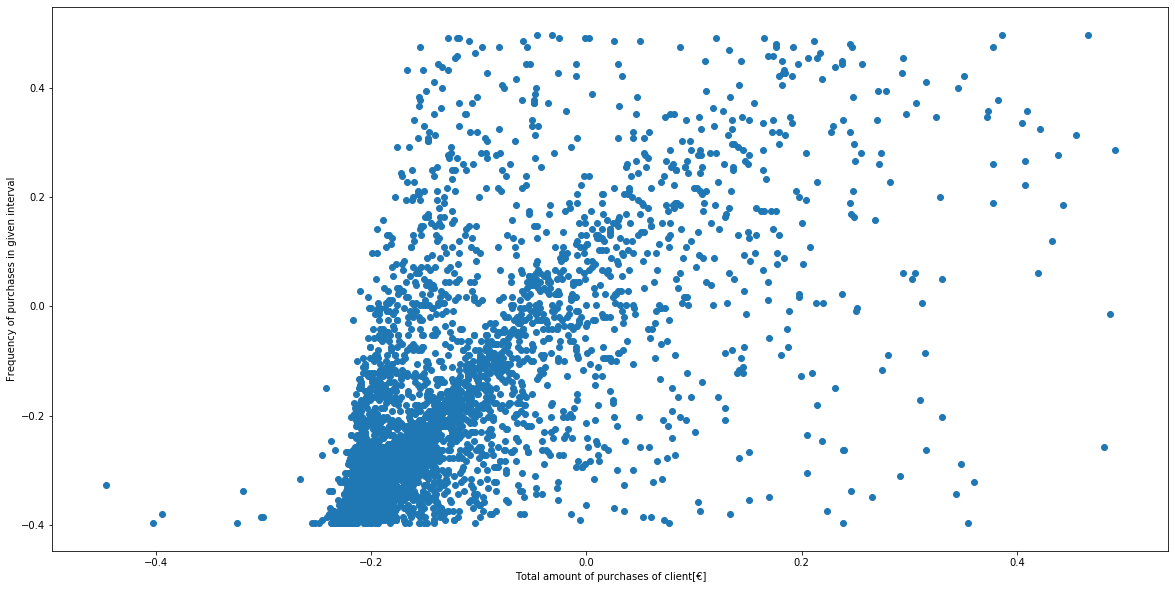

In [28]:
fig = plt.figure(figsize=(20,10))
plt.scatter(clean_df[:,0], clean_df[:,1])
plt.xlabel('Total amount of purchases of client[€]')
plt.ylabel('Frequency of purchases in given interval')
plt.show()

In [29]:
# Apply KMEANS
model = KMeans(n_clusters=5, max_iter = 10)
model.fit(clean_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

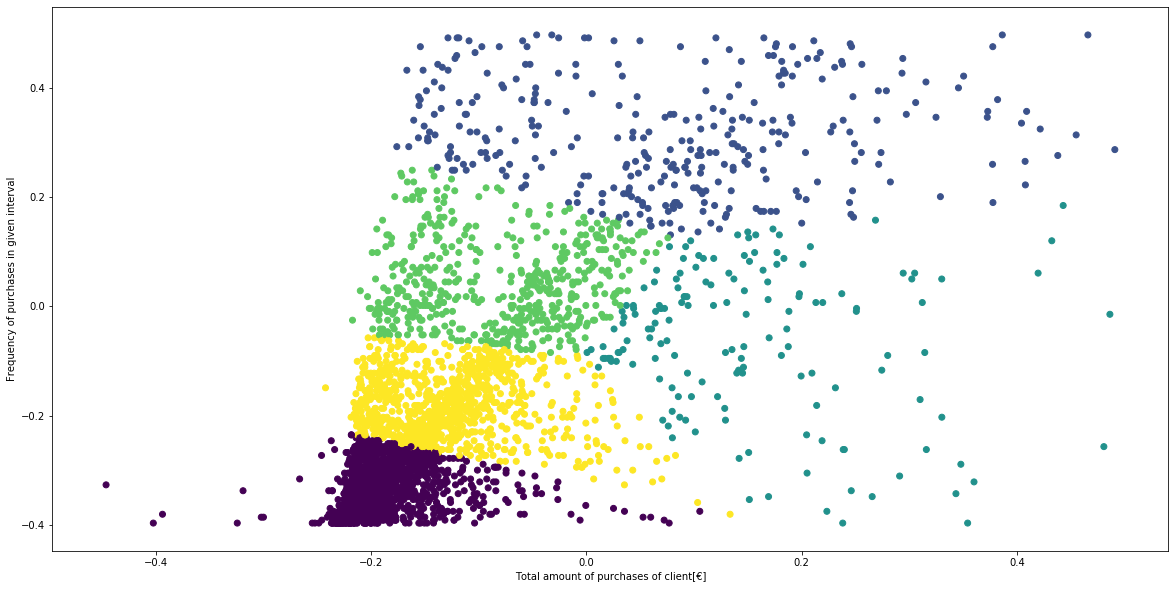

In [30]:
fig = plt.figure(figsize=(20,10))
plt.scatter(clean_df[:,0], clean_df[:, 1], c=model.labels_)
plt.xlabel('Total amount of purchases of client[€]')
plt.ylabel('Frequency of purchases in given interval')

plt.show()

# OPTIONAL TASK:
### Do:
    - create your own 3 features of choice out of original data
    - apply PCA on it, and extract the first 2 components
    - plot the data projected onto these two components
    - apply kmeans, does it work better than the former method 